# Estimating BJet uncertainty

The goal of this notebook is to estimate the bjet uncertainty.


In [1]:
#Set up
import os, sys
sys.path.append(os.getcwd() + "/../")
from prep_ana_II import *
sys.path.append(os.getcwd() + "/../tools/")
from lepton_eff import muonEff, electronEff
sys.path.append(os.getcwd() + "/../tools/bjetsys/")
import BTagCalibrationStandalone as BT


import matplotlib
matplotlib.rcParams.update({'font.size': 22})
import warnings
warnings.filterwarnings('ignore')

Welcome to JupyROOT 6.10/00
Loading binning options...
Loading plotting options
unc_mc_process and scales are parameter dictionaries


In [2]:
%matplotlib inline

In [3]:
jet_columns = ["jet1_csv", "jet2_csv", "jet3_csv","jet1_flv", "jet2_flv", "jet3_flv", "numb_BJet_gen", "numb_jets", "numb_BJet", "jet1_pt", "jet2_pt", "jet3_pt"]
df = load_origMC(jet_columns)
#df_tt_l = rp.read_root("/home/gunter/WW_analysis/data_alpha/ttbar_leptonic_complete.root",
#                       columns=jet_columns)
#df_tt_sl = rp.read_root(data_path+"/ttbar_semileptonic_complete.root",
#                        columns=jet_columns)

#df = pd.concat([df_tt_l, df_tt_sl, ])#df_tbar_s, df_tbar_t, df_tbar_tw, df_t_s, df_t_t, df_t_tw])
#df = df[(df.numb_BJet_gen > 0)]
#df = rp.read_root("/home/gunter/WW_analysis/data_alpha/ww_complete.root",
#                       columns=jet_columns)

Warning in <TStreamerInfo::BuildCheck>: 
   The StreamerInfo of class string read from file /home/gunter/WW_analysis/data_alpha/dyjetstoll_m-50_complete.root
   has the same version (=2) as the active class but a different checksum.
   You should update the version to ClassDef(string,3).
   Do not try to write objects with the current class definition,
   the files will not be readable.

Warning in <TStreamerInfo::CompareContent>: The following data member of
the in-memory layout version 2 of class 'string' is missing from 
the on-file layout version 2:
   string::_Alloc_hider _M_dataplus; //
Warning in <TStreamerInfo::CompareContent>: The following data member of
the in-memory layout version 2 of class 'string' is missing from 
the on-file layout version 2:
   unsigned long _M_string_length; //
Warning in <TStreamerInfo::CompareContent>: The following data member of
the in-memory layout version 2 of class 'string' is missing from 
the on-file layout version 2:
   string::(anonymous) ;

In [8]:
df[(df.numb_jets == 1) & (df.numb_BJet_gen == 1) ].shape

(2144578, 12)

## Calc MC Bjet Efficiencies for WW

In [36]:
ptmin = [ 30, 40, 50, 60, 70, 80, 100, 120, 160, 210, 260, 320, 400, 500, 600, 800]
ptmax = [40, 50, 60, 70, 80,100, 120, 160, 210, 260, 320, 400, 500, 600, 800, 1000]

temp_list = []
for it, min_pt in enumerate(ptmin):
    pt_cut = (df.jet1_pt >= min_pt) & (df.jet1_pt < ptmax[it])
    selected = float( df[(df.numb_jets == 1) & (df.jet1_flv < 4) & (df.jet1_csv > .8484) & pt_cut].shape[0] )
    tot = float( df[(df.numb_jets == 1) & (df.jet1_flv < 4) & pt_cut].shape[0] )
    temp_list.append( selected / tot )
    #print selected, tot
temp_list

[0.010224535206605491,
 0.0090752110514198,
 0.00806412198817262,
 0.008831463864830328,
 0.008478437431905073,
 0.008668121599606553,
 0.009386300787066582,
 0.011345999464811346,
 0.010502471169686986,
 0.013101476893758932,
 0.018541930046354824,
 0.01507537688442211,
 0.030280649926144758,
 0.015306122448979591,
 0.030054644808743168,
 0.012345679012345678]

In [19]:
temp_list

[0.4442664407048948,
 0.5102205372678276,
 0.5542576310070667,
 0.5823890951134911,
 0.6001000347947112,
 0.6196382554577722,
 0.6298785946506259,
 0.6329302867842538,
 0.5800544905623328,
 0.5224910394265233,
 0.47150500116306115,
 0.40217391304347827,
 0.33751743375174337,
 0.2570093457943925,
 0.2661290322580645,
 0.21739130434782608]

## Test scale factors for efficiencies and inefficiencies

In [16]:
def calc_ieff_and_eff(df):
    #Input df[(df.numb_BJet_gen > 0) ]
    jet_csv_mask = [#df.numb_jets == 0, 
                (df.jet1_csv.values < .846),
                df.jet2_csv.values < .846,
                df.jet3_csv.values < .846,]
               #df.jet4_csv.values < .,
               #df.jet5_csv.values < .,
               #df.jet6_csv.values < .]
    #Needs to be updated

    mc_eff = np.array([
    0.4442664407048948,
    0.5102205372678276,
    0.5542576310070667,
    0.5823890951134911,
    0.6001000347947112,
    0.6196382554577722,
    0.6298785946506259,
    0.6329302867842538,
    0.5800544905623328,
    0.5224910394265233,
    0.47150500116306115,
    0.40217391304347827,
    0.33751743375174337,
    0.2570093457943925,
    0.2661290322580645,
    0.21739130434782608])


    bjet_unc = [0.0264008, 0.0272757, 0.0275565, 0.0248745, 0.0218456, 0.0253845, 0.0239588, 0.0271791, 0.0273912,
    0.0379822, 0.0411624, 0.0786307, 0.0866832, 0.0942053, 0.102403, 0.1]
    bjet_mc_eff_unc = [
    0.002044870533737016,
    0.0016060593437708893,
    0.0014327658052221096,
    0.0013855675110511305,
    0.0014172562032056706,
    0.0011053255585410577,
    0.001330940168220748,
    0.0013147241396643421,
    0.001985532350816485,
    0.003536128885636905,
    0.005681122677667734,
    0.009330720680568763,
    0.016278904251102247,
    0.030427507469274185,
    0.04294916994144168,
    0.09408167988273519]#np.sqrt(csv_bjet) / true_bjet
    ptmin = [30, 40, 50, 60, 70, 80, 100, 120, 160, 210, 260, 320, 400, 500, 600, 800]
    ptmax = [40, 50, 60, 70, 80,100, 120, 160, 210, 260, 320, 400, 500, 600, 800, 1000]


    bjet_iw = np.ones(df.shape[0])
    for i in xrange(len(ptmin)):
        #roll the dice
        offset_unc = np.random.normal(0,bjet_unc[i])
        offset_mc_eff = np.random.normal(0,bjet_mc_eff_unc[i])

        #loop over jets
        for jet_iter in range(1,len(jet_csv_mask)+1):
            jet_interest= 'jet'+str(jet_iter)

            jet_pt_mask = ( df[jet_interest+'_pt'] > ptmin[i] ) & ( df[jet_interest+'_pt'] < ptmax[i] )
            mc_eff_ = mc_eff[i] + offset_mc_eff

            csvt = lambda x: 0.884016*((1.+(0.0331508*x))/(1.+(0.0285096*x)))

            #Inefficiency
            w = csvt(df[jet_csv_mask[jet_iter-1] & jet_pt_mask ][jet_interest+'_pt'].values) + offset_unc
            bjet_iw[ jet_csv_mask[jet_iter-1].astype(bool) & jet_pt_mask.values ] *= (1 - w * mc_eff_) / (1 - mc_eff_) 
            #Efficiency
            print  bjet_iw.shape, np.invert(jet_csv_mask[jet_iter-1].astype(bool)).shape, jet_pt_mask.shape
            bjet_iw[ np.invert(jet_csv_mask[jet_iter-1].astype(bool)) & jet_pt_mask.values ] *= w 

    return bjet_iw


In [17]:
plt.hist( calc_ieff_and_eff(df), bins=20)

(11392340,) (11392340,) (11392340,)


ValueError: operands could not be broadcast together with shapes (211480,) (281780,) (211480,) 

# Number of Jets, gen Bjets and tagged Bjets

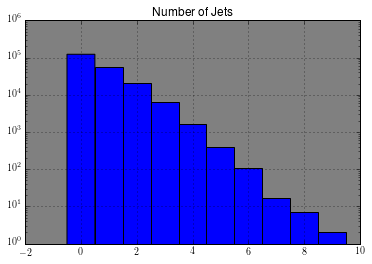

In [4]:
df.numb_jets.hist(range=(-.5, 9.5)).set_axis_bgcolor("grey")
plt.yscale("log")
plt.title("Number of Jets")

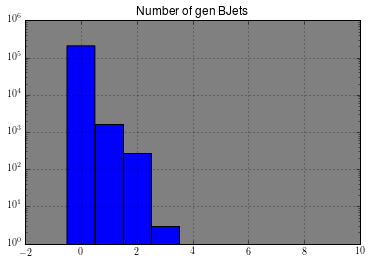

In [5]:
df.numb_BJet_gen.hist(range=(-.5, 9.5)).set_axis_bgcolor("grey")
plt.yscale("log")
plt.title("Number of gen BJets")

## Lets look at indivisual jets

In [23]:
print "One jet and one gen bjet", df[(df.numb_jets == 1) & (df.numb_BJet_gen == 1)].shape
print "One jet and one gen bjet and one tagged bjet", df[(df.numb_jets == 1) & (df.numb_BJet_gen == 1) & (df.jet1_csv > .84)].shape

print "Two jet and one gen bjet", df[(df.numb_jets == 2) & (df.numb_BJet_gen == 2)].shape
print "Two jet and one gen bjet and two tagged bjet", df[(df.numb_jets == 2) & (df.numb_BJet_gen == 2) & (df.jet1_csv > .84) & (df.jet2_csv > .84)].shape



One jet and one gen bjet (587, 12)
One jet and one gen bjet and one tagged bjet (171, 12)
Two jet and one gen bjet (72, 12)
Two jet and one gen bjet and two tagged bjet (14, 12)


In [24]:
print "Jet 1 is a gen bjet", df[(df.jet1_flv.abs() == 5)].shape
print "Jet 1 is a gen bjet and was tagged as a bjet", df[(df.jet1_flv.abs() == 5) & (df.jet1_csv > .84)].shape

print "Jet 2 is a gen bjet", df[(df.jet2_flv.abs() == 5)].shape
print "Jet 2 is a gen bjet and was tagged as a bjet", df[(df.jet2_flv.abs() == 5) & (df.jet2_csv > .84)].shape

print "Jet 3 is a gen bjet", df[(df.jet3_flv.abs() == 5)].shape
print "Jet 3 is a gen bjet and was tagged as a bjet", df[(df.jet3_flv.abs() == 5) & (df.jet3_csv > .84)].shape

Jet 1 is a gen bjet (721, 12)
Jet 1 is a gen bjet and was tagged as a bjet (357, 12)
Jet 2 is a gen bjet (459, 12)
Jet 2 is a gen bjet and was tagged as a bjet (228, 12)
Jet 3 is a gen bjet (171, 12)
Jet 3 is a gen bjet and was tagged as a bjet (90, 12)


In [25]:
data = []
for i in ["1", "2", "3"]:
    cut_flv = df["jet"+i+"_flv"].abs() == 5
    cut_tag = df["jet"+i+"_csv"] > .84
    data.append( float(df[cut_tag & cut_flv].shape[0]) / df[cut_flv].shape[0] )

print data

[0.49514563106796117, 0.49673202614379086, 0.5263157894736842]


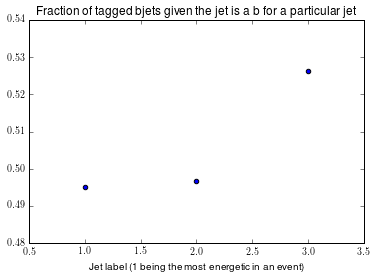

In [32]:
plt.scatter( [1,2,3], data )
plt.title("Fraction of tagged bjets given the jet is a b for a particular jet")
plt.xlabel("Jet label (1 being the most energetic in an event)")


## If we invert the cut

In [33]:
data = []
for i in ["1", "2", "3"]:
    cut_flv = df["jet"+i+"_flv"].abs() != 5
    cut_tag = df["jet"+i+"_csv"] <= .84
    data.append( float(df[cut_tag & cut_flv].shape[0]) / df[cut_flv].shape[0] )

print data

[0.9927752685223933, 0.9979102512982864, 0.999419516711682]


# Repeating Michael's estimate procedure

| N tagged jets| N taggable jets|
|-------------:|---------------:|
|-              |2, 1, 0|
|0         |(1 - e)<sup>2</sup>, (1 - e), 1|

In [4]:
#WW 
#looks to be negliable as expected
eps = .5
B = (1 - eps)**2 * df[df.numb_BJet_gen == 2].shape[0] + (1 - eps) * df[df.numb_BJet_gen == 1].shape[0] + df[df.numb_BJet_gen == 1].shape[0]
dB = 2*(1 - eps) * df[df.numb_BJet_gen == 2].shape[0] + df[df.numb_BJet_gen == 1].shape[0]

B *= scales["WW"]
dB *= scales["WW"]

D = 13948.

print dB / (D - B) * 0.03 


0.00144854069637


In [5]:
df_tt_l = rp.read_root("/home/gunter/WW_analysis/data_alpha/ttbar_leptonic_complete.root",
                       columns=jet_columns)
df_tt_sl = rp.read_root(data_path+"/ttbar_semileptonic_complete.root",
                        columns=jet_columns)
df_top = pd.concat([df_tt_l, df_tt_sl])

In [6]:
data = []
for i in ["1", "2", "3"]:
    cut_flv = df_top["jet"+i+"_flv"].abs() == 5
    cut_tag = df_top["jet"+i+"_csv"] > .84
    data.append( float(df_top[cut_tag & cut_flv].shape[0]) / df_top[cut_flv].shape[0] )

print data

[0.651731607839523, 0.6287727756264515, 0.6152479216926212]


In [46]:
#Top
def calc_unc_bjet(df, eps=.63, D= 1922276, s=1):
    """
    eps: efficiency of bjet
    D: number of events for that process
    s: scale
    ?Scale for each process?
    """
    B = (1 - eps)**2 * df[df.numb_BJet_gen == 2].shape[0] + (1 - eps) * df[df.numb_BJet_gen == 1].shape[0] + df[df.numb_BJet_gen == 0].shape[0]
    dB = 2*(1 - eps) * df[df.numb_BJet_gen == 2].shape[0] + df[df.numb_BJet_gen == 1].shape[0]

    B *= scales["ttbar_leptonic"] * s
    dB *= scales['ttbar_leptonic'] * s

    #D = 1922276 #Post preselection number

    print dB / (D - B) * 0.03 #0.03 is a conservative estimate taken from the bjet unc under Test scale factors header

In [19]:
calc_unc_bjet(df[df.numb_BJet == 0])

0.00271895979873


In [47]:
calc_unc_bjet(df[(df.numb_BJet == 0) & (df.process == "Top") ], eps=.63, D= 17383, s= 3015./ (df[(df.numb_BJet == 0) & (df.process == "Top")].shape[0] * scales['ttbar_leptonic']) )


0.0336732210065


## Post preselection &sigma; <sub> &epsilon; top </sub>

0.00169

## Post RF &sigma; <sub> &epsilon; top</sub>  Estimate

0.0114  <- This is the number we are interested in.

# ToDo:
- Change bjet uncertainty calc to reflect to above.

In [4]:
df.jet1_flv.value_counts()

 5.0    11871177
 0.0     5680886
 4.0      628491
-2.0      495974
Name: jet1_flv, dtype: int64

In [5]:
f = open("/home/gunter/WW_analysis/production/Analysis_13TeV/scripts/uncertainties_dir/data/CSVv2_Moriond17_B_H.csv")
strings = f.read()
f.close()
calibration = BT.BTagCalibration("csv")
calibration.readCSV(strings)

reader = BT.BTagCalibrationReader(BT.OperatingPoint.OP_MEDIUM, u"central", [u"up", u"down"])
reader.load(calibration, BT.JetFlavor.FLAV_B, u"comb")
reader.load(calibration, BT.JetFlavor.FLAV_C, u"comb")
reader.load(calibration, BT.JetFlavor.FLAV_UDSG, u"incl")

In [ ]:
#Get all b / c jets that were tagged as b
#Get all light jets that were tagged as b
def calc_stuff(df_):
    df = copy.copy(df_)
    jet_flv = [0, 4, 5]
    jet_flv_key = {0:BT.JetFlavor.FLAV_UDSG, 4:BT.JetFlavor.FLAV_C, 5:BT.JetFlavor.FLAV_B}
    for flv in jet_flv:
        bjets_eta =   df[(df.jet1_flv == flv) & (df.jet1_csv > .8484)].jet1_eta.values
        bjets_pt =    df[(df.jet1_flv == flv) & (df.jet1_csv > .8484)].jet1_pt.values

        central = np.array(BT.bjetScale(u"central", BT.JetFlavor.FLAV_B, list(bjets_eta), list(bjets_pt), reader, tagged=True))
        up = np.array(BT.bjetScale(u"up", BT.JetFlavor.FLAV_B, list(bjets_eta), list(bjets_pt), reader, tagged=True))
        down = np.array(BT.bjetScale(u"down", BT.JetFlavor.FLAV_B, list(bjets_eta), list(bjets_pt), reader, tagged=True))

        
    

In [21]:
eps_dic = {}
for process_decay in df.process_decay.unique():
    eff_data = []
    for i in ["1", "2", "3"]:
        cut_flv = df["jet"+i+"_flv"].abs() == 5
        cut_tag = df["jet"+i+"_csv"] > .84
        
        eff_data.append( float(df[(df.process_decay == process_decay) & cut_tag & cut_flv].shape[0]) /\
                        ( .1 + df[(df.process_decay == process_decay) & cut_flv].shape[0] ))
    eff_data = np.array(eff_data)
    if abs(.63 - eff_data.mean()) > .12:
        print process_decay, .63, eff_data.mean()
    eps_dic[process_decay] = eff_data.mean()

print eps_dic 

GluGluWWTo2L2Nu 0.63 0.48054261371
WZJetsTo2L2Q 0.63 0.467854161171
WZJetsTo3LNu 0.63 0.506950678704
W1JetsToLNu 0.63 0.10752688172
W2JetsToLNu 0.63 0.192122958694
W3JetsToLNu 0.63 0.502270933021
{'ttbar_semileptonic': 0.62451008577254041, 'ZZJetsTo2L2Nu': 0.53712284496918883, 'ttbar_leptonic': 0.63139329912447895, 'GluGluWWTo2L2Nu': 0.48054261370967555, 'Tbar_t-channel': 0.62234415925513087, 'DYJetsToLL_M-50': 0.54291330250420267, 'W2JetsToLNu': 0.19212295869356388, 'WZJetsTo2L2Q': 0.46785416117100737, 'T_tW-channel': 0.5961871467188915, 'DYJetsToLL_M-10to50': 0.56220187617524342, 'WW': 0.51404982810232613, 'ZZJetsTo2L2Q': 0.56260417827275522, 'WGToLNuG': 0.52202593141147302, 'Tbar_tW-channel': 0.60083328430869098, 'WZJetsTo3LNu': 0.50695067870411015, 'W3JetsToLNu': 0.50227093302065773, 'T_t-channel': 0.60601924159747711, 'T_s-channel': 0.57866940036109338, 'W4JetsToLNu': 0.56167965777775875, 'W1JetsToLNu': 0.10752688172043011, 'GluGluHToWWTo2L2Nu': 0.67513254847250792}


In [16]:
#Top
def calc_unc_bjet(df, eps=.63, D= 1922276, process=None, scales=scales, eps_dic=None):
    """
    eps: efficiency of bjet
    D: number of events for that process
    s: scale
    ?Scale for each process?
    """


    
    process_cut = df.process == df.process
    if process != None:
        process_cut = df.process == process
    
    B = 0
    dB = 0
    arr_B = np.array([0.,0.,0.])
    for process_decay in df.process_decay.unique(): 
        ####################
        #Calc efficiency of bjet tagging for a given process
        if type(eps_dic) != type(None):
            if process_decay in eps_dic.keys():
                eps = eps_dic[process_decay]
        ####################
        
        B_ = (1 - eps)**2 * df[(df.numb_BJet_gen == 2) & (process_cut) & (df.process_decay == process_decay)].weight.sum() +\
             (1 - eps) *    df[(df.numb_BJet_gen == 1) & (process_cut) & (df.process_decay == process_decay)].weight.sum() +\
                            df[(df.numb_BJet_gen == 0) & (process_cut) & (df.process_decay == process_decay)].weight.sum()
        B_ *= scales[process_decay]
        B  += B_
        
        dB_ = 2*(1 - eps) * df[(df.numb_BJet_gen == 2) & (process_cut) & (df.process_decay == process_decay)].weight.sum() +\
                            df[(df.numb_BJet_gen == 1) & (process_cut) & (df.process_decay == process_decay)].weight.sum()
                
        dB_ *= scales[process_decay]
        dB  += dB_ 
        #print process_decay, "B:", B_, "dB", dB_
        arr_B_ = scales[process_decay] * np.array([df[(df.numb_BJet_gen == 2) & (process_cut) & (df.process_decay == process_decay)].weight.sum(),\
                             df[(df.numb_BJet_gen == 1) & (process_cut) & (df.process_decay == process_decay)].weight.sum(),\
                             df[(df.numb_BJet_gen == 0) & (process_cut) & (df.process_decay == process_decay)].weight.sum()])
        arr_B += arr_B_
        print process_decay, arr_B_, eps
    print "Total B and dB", B, dB, arr_B
    #D = 1922276 #Post preselection number

    print dB / (D - B) * 0.03

In [30]:
calc_unc_bjet(df[(df.numb_BJet == 0) & (df.process != "WW")  ], eps=.63, D=17483., scales=scales_)#, eps_dic=eps_dic)#, process="Top")
#calc_unc_bjet(df[(df.numb_BJet == 0) & (df.process != "WW")], eps=.63, D=17483, scales=scales_)#, process="Top")

DYJetsToLL_M-50 [  9.17435527e-01   1.16094246e+01   1.32089990e+03] 0.63
DYJetsToLL_M-10to50 [  0.039267     0.28891468  16.77093697] 0.63
ttbar_leptonic [  794.66949463  1163.68383789   373.3024292 ] 0.63
ttbar_semileptonic [  2.15238404  51.45153046  24.92444801] 0.63
Tbar_tW-channel [ 17.2174511   92.33448792  67.8452301 ] 0.63
Tbar_t-channel [  0.25165331   9.88845348  18.47751808] 0.63
T_tW-channel [ 14.6424284   87.40062714  66.34017944] 0.63
T_s-channel [ 0.01821843  1.43742537  0.6551677 ] 0.63
T_t-channel [  0.38940457  16.57843781  30.49170685] 0.63
ZZJetsTo2L2Q [ 0.02112212  0.05946016  0.68980908] 0.63
ZZJetsTo2L2Nu [  1.69182587e-02   1.77778929e-01   1.71844177e+01] 0.63
WZJetsTo2L2Q [  6.73972536e-04   7.71265849e-03   8.04495394e-01] 0.63
WZJetsTo3LNu [  1.66031852e-01   1.89344597e+00   3.06040009e+02] 0.63
W1JetsToLNu [    0.             4.2273399   1032.71053657] 0.63
W2JetsToLNu [  3.33958447e-01   1.88601437e+01   6.79945190e+02] 0.63
W3JetsToLNu [   0.49172753   

In [26]:
df[df.numb_BJet==0].shape

(5202130, 53)

In [36]:
process_yields(df)#[df.numb_BJet == 0])

WW 20743.6525099 27875.2968481
DY 1990216.39714 41713.1105388
Top 189694.288798 269731.336554
WZ 3988.48393698 2495.23599191
ZZ 1002.20005233 54.400832488
WG 356.779793117 2747.35327592
WJ 4243.7660875 21519.5247032
Higgs 465.052580065 631.635791066
{'Diff Flavor': [2483, 25393, 27875, 41713, 269731, 2495, 54, 2747, 21520, 632, 366768], 'Same Flavor': [1353, 19391, 20744, 1990216, 189694, 3988, 1002, 357, 4244, 465, 2210711], 'Process': ['GluGluWWTo2L2Nu', 'WW', 'WW', 'DY', 'Top', 'WZ', 'ZZ', 'WG(*)', 'WJ', 'Higgs', 'Total']}


,Diff Flavor,Process,Same Flavor
0,2483,GluGluWWTo2L2Nu,1353
1,25393,WW,19391
2,27875,WW,20744
3,41713,DY,1990216
4,269731,Top,189694
5,2495,WZ,3988
6,54,ZZ,1002
7,2747,WG(*),357
8,21520,WJ,4244
9,632,Higgs,465


In [29]:
2025325 + 169556

2194881

In [37]:
366768 + 2210711

2577479

In [54]:
scales_["ttbar_leptonic"] = 3000./df[(df.numb_BJet == 0) &(df.process == "Top")].shape[0]

scales_ = {"DYJetsToLL_M-50": 746.256,
"DYJetsToLL_M-10to50": 19.057,
"GluGluWWTo2L2Nu": 16527.7,
"GluGluHToWWTo2L2Nu": 498.432,
"WW": 65402.2,
"ttbar_leptonic": 76050.6,
"ttbar_semileptonic": 696.534,
"Tbar_tW-channel": 597.767,
"Tbar_t-channel": 166.822,
"T_tW-channel": 590.571,
"T_s-channel": 52.444,
"T_t-channel": 227.515,
"ZZJetsTo2L2Q": 156.352,
"ZZJetsTo2L2Nu": 11083.5,
"WZJetsTo2L2Q": 111.641,
"WZJetsTo3LNu": 4660.07,
"W1JetsToLNu": 215.53,
"W2JetsToLNu": 250.6,
"W3JetsToLNu": 144.395,
"W4JetsToLNu": 40.8175,
"WGToLNuG": 118.292}


In [25]:
scales_ = {"DYJetsToLL_M-50": 1333.44449562,
"DYJetsToLL_M-10to50": 17.0983160996,
"GluGluWWTo2L2Nu": 696.691837944,
"GluGluHToWWTo2L2Nu": 190.272497841,
"WW": 9472.77836426,
"ttbar_leptonic": 2343.17775711,
"ttbar_semileptonic": 78.6666496567,
"Tbar_tW-channel": 177.595683457,
"Tbar_t-channel": 28.6176223975,
"T_tW-channel": 168.562059251,
"T_s-channel": 2.11081145101,
"T_t-channel": 47.4746349965,
"ZZJetsTo2L2Q": 0.770684517967,
"ZZJetsTo2L2Nu": 17.379261044,
"WZJetsTo2L2Q": 0.81288307183,
"WZJetsTo3LNu": 308.099493089,
"W1JetsToLNu": 1036.93793429,
"W2JetsToLNu": 699.13929895,
"W3JetsToLNu": 204.5625758,
"W4JetsToLNu": 92.1358875852,
"WGToLNuG": 579.981519138}

In [26]:
tot_D = 0
for process_decay in scales_:
    scales_[process_decay] = scales_[process_decay] /\
                            df[(df.numb_BJet == 0) & (df.process_decay == process_decay)].weight.sum() 
    tot_D += df[(df.numb_BJet == 0) & (df.process_decay == process_decay)].weight.sum()

In [65]:
tot_D

2252905.6574310488

In [76]:
scales

{'DY1JetsToLL_M-10to50': 0.9252904392678166,
 'DY1JetsToLL_M-50': 0.7766378163951988,
 'DY2JetsToLL_M-10to50': 0.36225877324669714,
 'DY2JetsToLL_M-50': 0.29735738661210365,
 'DY3JetsToLL_M-10to50': 1.0727670109000442,
 'DY3JetsToLL_M-50': 0.16653798371286863,
 'DY4JetsToLL_M-10to50': 1.0495385182234422,
 'DY4JetsToLL_M-50': 0.1291829374743375,
 'DYJetsToLL_M-10to50': 6.528888910020416,
 'DYJetsToLL_M-50': 2.7145972424873355,
 'Da': 1,
 'GluGluHToWWTo2L2Nu': 0.34998591093119996,
 'GluGluWWTo2L2Nu': 0.06057407,
 'T_s-channel': 0.1141288390921382,
 'T_t-channel': 0.3378220326116155,
 'T_tW-channel': 0.40448777527555274,
 'Tbar_s-channel': 0.63184,
 'Tbar_t-channel': 0.2805844225276096,
 'Tbar_tW-channel': 0.406151676920305,
 'W1JetsToLNu': 9.089684109965036,
 'W2JetsToLNu': 4.536110409181353,
 'W3JetsToLNu': 2.0668813378510253,
 'W4JetsToLNu': 2.4821297734604895,
 'WGToLNuG': 8.072542833475318,
 'WGstarToLNu2E': 0.042796573443762906,
 'WW': 0.22378550507364844,
 'WZJetsTo2L2Q': 0.0076152

# light jet mistag

In [13]:
#Mistagged light jets
for process in df.process.unique():
    print process, "fraction of events with light jets",\
    df[((df.jet1_flv < 4) | (df.jet2_flv < 4))  & (df.numb_jets > 0) & (df.process == process)].shape[0] /\
    float(df[df.process == process].shape[0])
    
    numerator = df[(((df.jet1_csv > .8484) & (df.jet1_flv < 4)) | ((df.jet2_csv > .8484) & (df.jet2_flv < 4))) &\
                   (df.numb_jets > 0) & (df.process == process)].shape[0]
    denominator =  df[((df.jet1_flv < 4) | (df.jet2_flv < 4)) & (df.numb_jets > 0) & (df.process == process)].shape[0] 
    print numerator, denominator, float(numerator) / denominator

DY fraction of events with light jets 0.432856817759
5175 502152 0.010305644506
WW fraction of events with light jets 0.440875243185
1267 118293 0.0107106929404
Top fraction of events with light jets 0.652827191915
71901 7508631 0.00957578019215
ZZ fraction of events with light jets 0.676563612168
2692 218618 0.0123137161624
WZ fraction of events with light jets 0.872730985095
4653 350494 0.0132755482262
WJ fraction of events with light jets 0.773568281938
94 7902 0.0118957226019
WG fraction of events with light jets 0.68808114962
12 814 0.014742014742
Higgs fraction of events with light jets 0.563176895307
20 1716 0.011655011655


In [5]:
df.jet1_flv.unique()

array([ 0., -2.,  4.,  5.])

In [9]:
df.keys()

Index([u'index', u'process', u'process_decay', u'gen_weight', u'weight',
       u'lep1_Charge', u'lep2_Charge', u'lep_Type', u'numbExtraLep',
       u'tot_npv', u'gen_pu', u'mll', u'numb_jets', u'metMod', u'numb_BJet',
       u'lep1_pt', u'lep2_pt', u'lep3_pt', u'dPhiLL', u'lep1_phi', u'lep2_phi',
       u'jet1_flv', u'jet2_flv', u'jet1_pt', u'jet2_pt', u'jet3_pt',
       u'jet4_pt', u'jet5_pt', u'jet6_pt', u'HT', u'jet1_csv', u'jet1_eta',
       u'jet2_eta', u'jet3_eta', u'jet4_eta', u'jet5_eta', u'jet6_eta',
       u'numb_BJet_gen', u'METProj_sin', u'met_over_sET', u'METProj',
       u'met_phi', u'dPhiLLMET', u'mllMET', u'qT', u'recoil', u'dPhiLLJet',
       u'dPhiMETJet', u'ww_pt', u'metFilter_flag', u'jet2_csv', u'jet3_csv',
       u'jet3_flv'],
      dtype='object')